In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# parse_dates immediately formats column 0 in .csv file to dates
pl_man = pd.read_csv('pl managers - small.csv', header=[0,1], index_col=0, parse_dates=[0])

In [3]:
pl_man.tail()

,Arsenal,Unnamed: 2_level_0,Aston Villa,Unnamed: 4_level_0,Barnsley,Unnamed: 6_level_0,Birmingham City,Unnamed: 8_level_0,Blackburn Rovers,Unnamed: 10_level_0,...,West Bromwich Albion,Unnamed: 112_level_0,West Ham United,Unnamed: 114_level_0,Wigan Athletic,Unnamed: 116_level_0,Wimbledon,Unnamed: 118_level_0,Wolverhampton Wanderers,Unnamed: 120_level_0
,Days,Name,Days,Name,Days,Name,Days,Name,Days,Name,...,Days,Name,Days,Name,Days,Name,Days,Name,Days,Name
2021-06-26,553.0,Mikel Arteta,991.0,Dean Smith,NaN,LD,NaN,LD,NaN,LD,...,3.0,Valerien Ismael,545.0,David Moyes,NaN,LD,NaN,DEFUNCT,18.0,Bruno Lage
2021-06-27,554.0,Mikel Arteta,992.0,Dean Smith,NaN,LD,NaN,LD,NaN,LD,...,4.0,Valerien Ismael,546.0,David Moyes,NaN,LD,NaN,DEFUNCT,19.0,Bruno Lage
2021-06-28,555.0,Mikel Arteta,993.0,Dean Smith,NaN,LD,NaN,LD,NaN,LD,...,5.0,Valerien Ismael,547.0,David Moyes,NaN,LD,NaN,DEFUNCT,20.0,Bruno Lage
2021-06-29,556.0,Mikel Arteta,994.0,Dean Smith,NaN,LD,NaN,LD,NaN,LD,...,6.0,Valerien Ismael,548.0,David Moyes,NaN,LD,NaN,DEFUNCT,21.0,Bruno Lage
2021-06-30,557.0,Mikel Arteta,995.0,Dean Smith,NaN,LD,NaN,LD,NaN,LD,...,7.0,Valerien Ismael,549.0,David Moyes,NaN,LD,NaN,DEFUNCT,22.0,Bruno Lage


In [4]:
def remake_multi_columns(df):
    cols = pd.DataFrame(df.columns.tolist())
    cols.loc[cols[0].str.startswith('Unnamed:'), 0] = np.nan
    cols[0] = cols[0].fillna(method='ffill')
    df.columns = pd.MultiIndex.from_frame(cols)
    
    return df

In [5]:
pl_man_remade = remake_multi_columns(pl_man)

In [6]:
pl_man_remade.tail()

0          Arsenal               Aston Villa             Barnsley       \
1             Days          Name        Days        Name     Days Name   
2021-06-26   553.0  Mikel Arteta       991.0  Dean Smith      NaN   LD   
2021-06-27   554.0  Mikel Arteta       992.0  Dean Smith      NaN   LD   
2021-06-28   555.0  Mikel Arteta       993.0  Dean Smith      NaN   LD   
2021-06-29   556.0  Mikel Arteta       994.0  Dean Smith      NaN   LD   
2021-06-30   557.0  Mikel Arteta       995.0  Dean Smith      NaN   LD   

0          Birmingham City      Blackburn Rovers       ...  \
1                     Days Name             Days Name  ...   
2021-06-26             NaN   LD              NaN   LD  ...   
2021-06-27             NaN   LD              NaN   LD  ...   
2021-06-28             NaN   LD              NaN   LD  ...   
2021-06-29             NaN   LD              NaN   LD  ...   
2021-06-30             NaN   LD              NaN   LD  ...   

0          West Bromwich Albion                  West Ham United               \
1                          Days             Name            Days         Name   
2021-06-26                  3.0  Valerien Ismael           545.0  David Moyes   
2021-06-27                  4.0  Valerien Ismael           546.0  David Moyes   
2021-06-28                  5.0  Valerien Ismael           547.0  David Moyes   
2021-06-29                  6.0  Valerien Ismael           548.0  David Moyes   
2021-06-30                  7.0  Valerien Ismael           549.0  David Moyes   

0          Wigan Athletic      Wimbledon          Wolverhampton Wanderers  \
1                    Days Name      Days     Name                    Days   
2021-06-26            NaN   LD       NaN  DEFUNCT                    18.0   
2021-06-27            NaN   LD       NaN  DEFUNCT                    19.0   
2021-06-28            NaN   LD       NaN  DEFUNCT                    20.0   
2021-06-29            NaN   LD       NaN  DEFUNCT                    21.0   
2021-06-30            NaN   LD       NaN  DEFUNCT                    22.0   

0                       
1                 Name  
2021-06-26  Bruno Lage  
2021-06-27  Bruno Lage  
2021-06-28  Bruno Lage  
2021-06-29  Bruno Lage  
2021-06-30  Bruno Lage  

[5 rows x 120 columns]

In [7]:
pl_man_remade['Average tenure'] = np.mean(pl_man_remade, axis=1)
pl_man_remade['Median tenure'] = np.nanmedian(pl_man_remade.iloc[:,::2], axis=1)

Text(0, 0.5, 'Years')

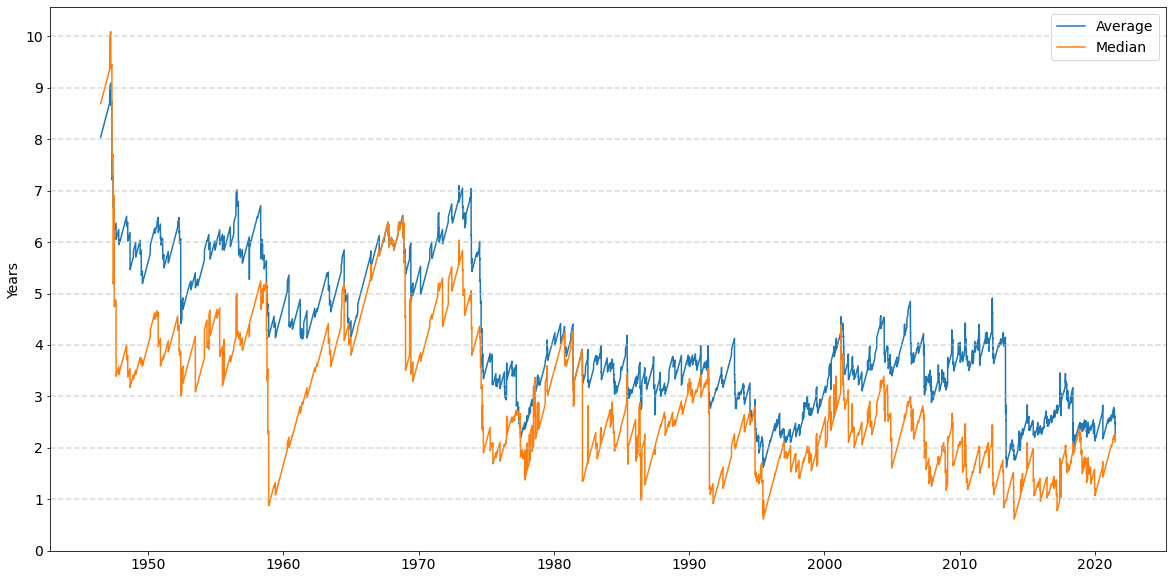

In [8]:
plot_font_size = 14

plt.figure(figsize=(20,10))
plt.plot(pl_man_remade['Average tenure'], label='Average')
plt.plot(pl_man_remade['Median tenure'], label='Median')

for n in range(1, 11):
    plt.axhline(365*n, alpha=0.6, c='silver', linestyle='dashed')

plt.yticks(ticks=np.arange(0, max(pl_man_remade['Median tenure']), 365), 
           labels=np.arange(0, max(pl_man_remade['Median tenure'] / 365), dtype=int),
           fontsize=plot_font_size)
plt.xticks(fontsize=plot_font_size)
    
plt.legend(loc='upper right', fontsize=plot_font_size)
plt.ylabel('Years', fontsize=plot_font_size)